In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from fastai.vision import *
from fastai.metrics import accuracy
from fastai.basic_data import *
from skimage.util import montage
import pandas as pd
from torch import optim
import re
import json
from PIL import Image
from fastai.callbacks.hooks import num_features_model
from torch.nn import L1Loss

import numpy as np
import torch
import pandas as pd
import random
import string
import matplotlib.pyplot as plt

In [2]:
model_loc = "models/best_b3_40.pth"
data_dir = "../../data/train/"

In [3]:
model_name = 'efficientnet-b3'
from efficientnet_pytorch import EfficientNet
image_size = EfficientNet.get_image_size(model_name)
RMSprop = partial(torch.optim.RMSprop)
model = EfficientNet.from_pretrained(model_name, num_classes=45)

Loaded pretrained weights for efficientnet-b3


In [4]:
src = (ImageList.from_folder(path=data_dir).split_by_rand_pct(0.2).label_from_folder())

In [5]:
res = []
res.append(rotate(degrees=(-90,90), p=1))

In [6]:
tfms=(res,[])

In [7]:
data = (src.transform(tfms, size=image_size, resize_method=ResizeMethod.SQUISH).databunch(bs=16).normalize(imagenet_stats))

In [8]:
kappa = KappaScore()
kappa.weights = "quadratic"

In [9]:
learn = Learner(data, model, loss_func=LabelSmoothingCrossEntropy(), opt_func=RMSprop, metrics=[accuracy,FBeta(beta=1,average='micro'), FBeta(beta=1,average='macro'),kappa, Precision(average='micro'),
               Recall(average='micro')])

In [10]:
learn.split([[learn.model._conv_stem, learn.model._bn0, learn.model._blocks[:8]],
             [learn.model._blocks[8:],learn.model._conv_head], 
             [learn.model._bn1,learn.model._fc]])
print("pls")

pls


In [11]:
learn = learn.load("best_b3_40")

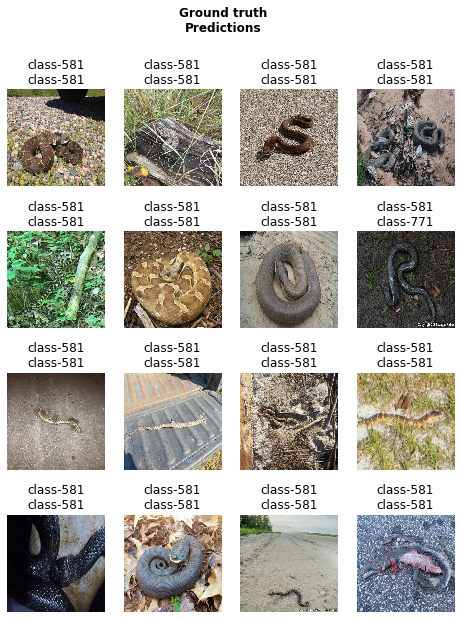

In [12]:
learn.show_results(ds_type=data.train_ds, rows=4, figsize=(8,10))

In [41]:

# im = PIL.Image.open(fn)

AttributeError: 'tuple' object has no attribute 'fnames'

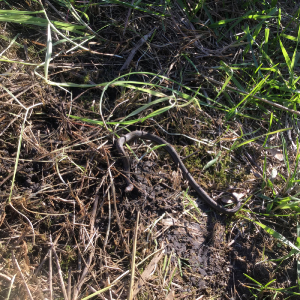

In [51]:
data.valid_ds[0][0]

In [37]:
predics = []
for i in range(0,30):
    p = learn.predict(data.valid_ds.x[i])
    predics.append(str(p[0]))

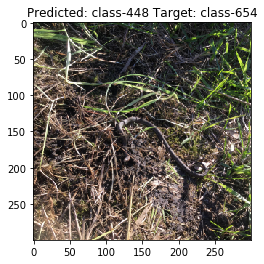

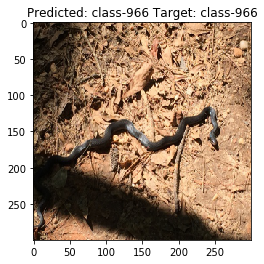

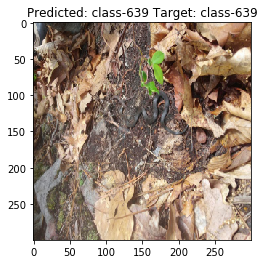

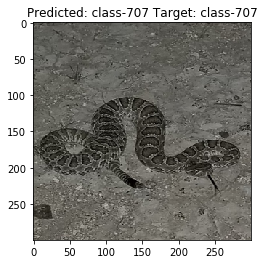

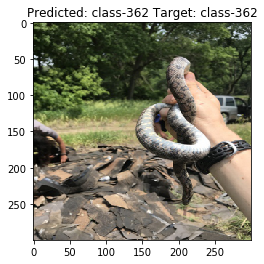

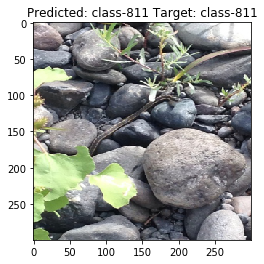

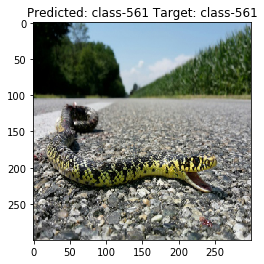

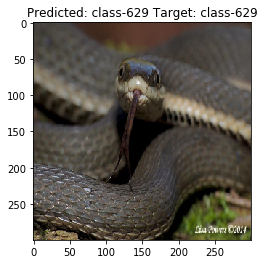

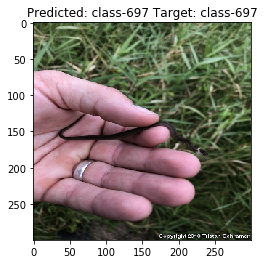

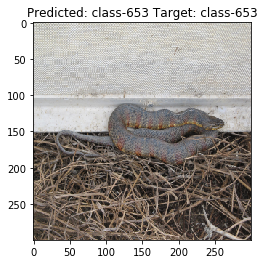

In [64]:
for i in range(0, 10):
    img, c = data.valid_ds[i]
    plt.imshow(img.data.permute(1,2,0))
    title = "Predicted: "+predics[i]+" Target: "+str(c)
    plt.title(title)
    plt.show()

In [13]:
preds,y = learn.get_preds(ds_type=data.valid_ds)